# RISCA

In [1]:
%pwd
%pip install numpy matplotlib seaborn pandas ipywidgets openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.9 MB/s eta 0:00:00


## Dependencies

In [3]:
%pip install numpy matplotlib seaborn pandas ipywidgets openpyxl
!git clone https://github.com/lin-k23/SAR_ADC.git
import pandas as pd
import os
%cd SAR_ADC/script
from preset_mdl import preset_mdl
from preset_pr import preset_pr
from signal_source import signal_source
from RISCA_core import RISCA_core
from analyser.analyser_new import Analyser
from util.load_assembler_xlsx import load_assembler_xlsx
from util.display_dataframe import display_dataframe

Cloning into 'SAR_ADC'...
remote: Enumerating objects: 360, done.
remote: Counting objects: 100% (360/360), done.
remote: Compressing objects: 100% (217/217), done.
remote: Total 360 (delta 208), reused 292 (delta 140), pack-reused 0 (from 0)
Receiving objects: 100% (360/360), 2.08 MiB | 14.98 MiB/s, done.
Resolving deltas: 100% (208/208), done.
/content/SAR_ADC/script


## Set Parameters

In [10]:
from ipywidgets import interact
mdl = preset_mdl()
pr = preset_pr()
def get_para(conf_name):
  pr['conf_name']=conf_name
interact(get_para,conf_name=['sar', 'tisar', 'pipesar2s', 'nssar1o1c', 'nssar1o1ccp'])

interactive(children=(Dropdown(description='conf_name', options=('sar', 'tisar', 'pipesar2s', 'nssar1o1c', 'ns…

<function __main__.get_para(conf_name)>

## Run Simulator

Loading file: ../config/nssar1o1c/timing_table.xlsx
[util.load_assembler_xlsx] parameter TI loaded: pr[TI]= 1
[util.load_assembler_xlsx] parameter F_in_center_1 loaded: pr[F_in_center_1]= 1000000
Loaded successfully!



,frame1,frame2,frame3,frame4
Item,,,,
CB1,OUT RST RMAJ RMIN2 SAM1,MSB CHS12,LSB,AMP0 F0P1


/content/SAR_ADC/script/util/specPlot.py:245: RuntimeWarning: divide by zero encountered in log10
  (h,) = plt.semilogx(freq, 10 * np.log10(spec))


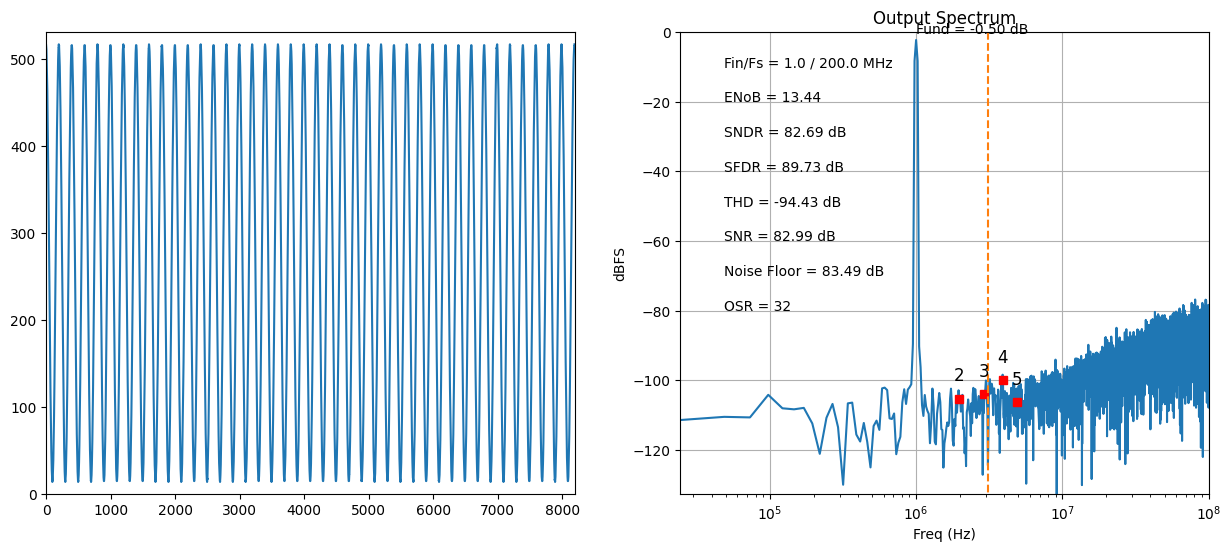

In [11]:
config_file_path = os.path.join("../config",pr['conf_name'])
pr_loaded = load_assembler_xlsx(config_file_path)

# update pr with pr_loaded
pr.update(pr_loaded)
if "T_assembler" in pr:
    print("Loaded successfully!\n")
cfg_info = pd.DataFrame(pr["T_assembler"])
display_dataframe(cfg_info,pr["conf_name"])
# Generate the input signal
v_in_peak = [pr["v_in_peak"], 0]
v_in_p, v_in_n = signal_source(pr, mdl, v_in_peak)

# Convertion begins
da = RISCA_core(mdl, pr, v_in_p, v_in_n)
# Analyse the result
test = Analyser(da, pr)
test.mode_analyser()